<a href="https://colab.research.google.com/github/KiranTanwani/Machine-Learning/blob/main/Book_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***BOOK PRICE PREDICTION***

The so-called paradoxes of an author, to which a readertakes exception,often exist not in the author's book at all, but ratherin the reader's head. - Friedrich NietzscheBooks open doors to the unimagined worlds which areunique to every person. It is more thanjust a hobby for many. There are many among us whoprefer to spend more time with booksthan anything else. Here we explore a big databaseof books. Books of different genres, fromthousands of authors. In this challenge, participantsare required to use the dataset to build aMachine Learning model to predict the price of booksbased on a given set of features. 

Size oftraining set: 6237 records 

Size of test set: 1560records 

**FEATURES:** 

Title: The title of the book

Author: The author(s) of the book. 

Edition: The editionof the book eg (Paperback,– Import, 26Apr 2018) 

Reviews: The customer reviews about thebook 

Ratings: The customer ratings of thebook 

Synopsis: The synopsis of the book 

Genre: Thegenre the book belongs to Book

Category:The department the book is usually available at. 

Price:The price of the book (Target variable)

In [ ]:
import numpy as np  #helps in mathematical operations
import matplotlib.pyplot as plt #helps in plotting of graph
import pandas as pd #helps in making dataframes and importing csv files
import seaborn as sns#helps in visualization

In [ ]:
from google.colab import drive #to import google drive data

In [ ]:
drive.mount('/content/drive') # mount the drive on colab using authentication

Mounted at /content/drive


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Book Price Prediction" # Going to the location where the data is in drive.

/content/drive/My Drive/Colab Notebooks/Book Price Prediction


In [ ]:
#Reading the xlsx files from the drive
train =pd.read_excel("Data_Train.xlsx")
test = pd.read_excel("Data_Test.xlsx")

In [ ]:
#Converting into dataframes
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [ ]:
train

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62
...,...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,"Paperback,– 8 Aug 2018",5.0 out of 5 stars,2 customer reviews,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthropology (Books),Humour,322.00
6233,The Chemist,Stephenie Meyer,"Paperback,– 21 Nov 2016",3.3 out of 5 stars,9 customer reviews,"In this gripping page-turner, an ex-agent on t...",Contemporary Fiction (Books),"Crime, Thriller & Mystery",421.00
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,"Paperback,– 8 Jun 2006",3.8 out of 5 stars,3 customer reviews,'The most refreshing and radiant love story yo...,Romance (Books),Romance,399.00
6235,Frostfire (Kanin Chronicles),Amanda Hocking,"Paperback,– 15 Jan 2015",3.5 out of 5 stars,4 customer reviews,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure (Books),Action & Adventure,319.00


# ***DATA Pre Processing***

In [ ]:
#Appending the test and train dataset.
dataset = train.append(test)

In [ ]:
### Cleaning Edition Columns
list1 = []
for i in list(dataset.Edition):
    list1.append(i.split(',')[0])

In [ ]:
dataset.Edition = list1

In [ ]:
### Cleaning Reviews Columns
list1 = []
for i in dataset.Reviews:
    list1.append(i.split(" ")[0])

In [ ]:
dataset.Reviews = list1

In [ ]:
### Cleaning Ratings Columns
list1=[]
for i in dataset.Ratings:
    list1.append(i.split(" ")[0])

In [ ]:
dataset.Ratings = list1

In [ ]:
#To check the type of all the features and whether or not they contain null values.
def dataInfo(data):
    d={"Feature":data.columns,
     "Type":data.dtypes,
     "Missing_Data":data.isnull().sum()}
    data_info=pd.DataFrame(data=d)
    data_info.reset_index(drop=True,inplace=True)
    return data_info

In [ ]:
dataInfo(dataset)

,Feature,Type,Missing_Data
0,Title,object,0
1,Author,object,0
2,Edition,object,0
3,Reviews,object,0
4,Ratings,object,0
5,Synopsis,object,0
6,Genre,object,0
7,BookCategory,object,0
8,Price,float64,1560


In [ ]:
#Performing one hot encoding on Author, Edition,Genre and Book category using label encoder.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.Author = le.fit_transform(dataset.Author)
dataset.Edition = le.fit_transform(dataset.Edition)
dataset.Genre = le.fit_transform(dataset.Genre)
dataset.BookCategory = le.fit_transform(dataset.BookCategory)

In [ ]:
## Dropping Synopsis and Title
dataset.drop('Synopsis',axis=1,inplace=True)
dataset.drop('Title',axis=1,inplace=True)

In [ ]:
dataset.head()

,Author,Edition,Reviews,Ratings,Genre,BookCategory,Price
0,748,13,4.0,8,1,0,220.00
1,370,13,3.9,14,78,2,202.93
2,4045,13,4.8,6,202,6,299.00
3,79,13,4.1,13,96,5,180.00
4,1138,8,5.0,1,264,1,965.62


In [ ]:
#Seeing the information of the features of the dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7797 entries, 0 to 1559
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Author        7797 non-null   int64  
 1   Edition       7797 non-null   int64  
 2   Reviews       7797 non-null   object 
 3   Ratings       7797 non-null   object 
 4   Genre         7797 non-null   int64  
 5   BookCategory  7797 non-null   int64  
 6   Price         6237 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 487.3+ KB


In [ ]:
### Convertings Obejects dtypes to int and float
dataset.Reviews = dataset.Reviews.astype(float)
dataset.Ratings = dataset.Ratings.astype(str)
dataset.Ratings = dataset.Ratings.str.replace(',','')
dataset.Ratings = dataset.Ratings.astype(int)

# ***DATA VISUALIZATION***

Text(0.5, 1.0, 'Correlation Heatmap of Featrues')

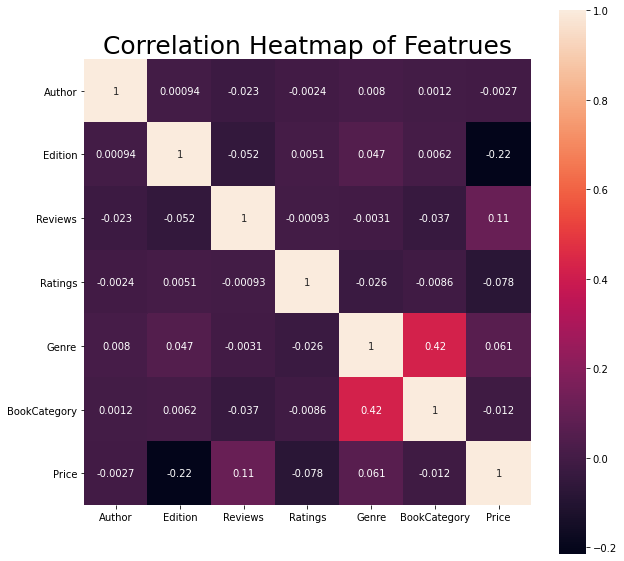

In [ ]:
#Plotting the correlation graph between all the features.
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True,square=True)
plt.title('Correlation Heatmap of Featrues',size=25)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


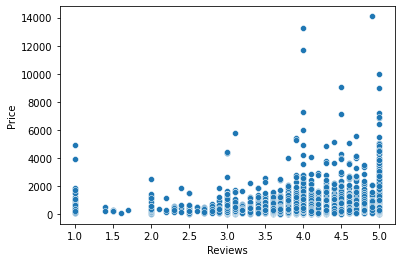

In [ ]:
#Plotting a scatter plot of Reviews v/s Price
sns.scatterplot(dataset.Reviews,dataset.Price)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


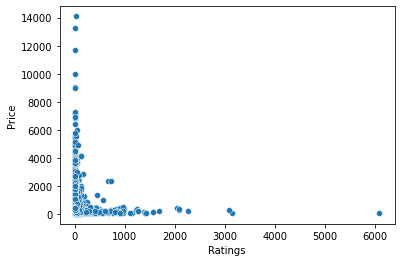

In [ ]:
#Plotting a scatter plot of Ratings v/s Price
sns.scatterplot(dataset.Ratings,dataset.Price)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


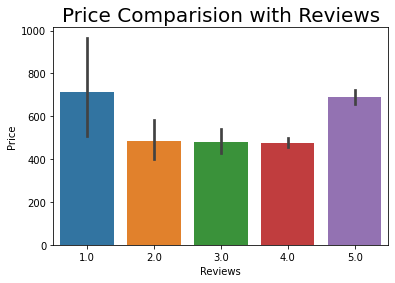

In [ ]:
#Plotting a bar grpah of Reviews v/s Price
plt.title('Price Comparision with Reviews',size=20)
sns.barplot(round(dataset.Reviews),dataset.Price)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


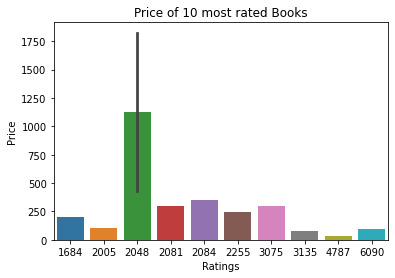

In [ ]:
#Plotting the bar graph of 10 most rated books
plt.title('Price of 10 most rated Books')
sns.barplot(dataset.Ratings.sort_values(ascending=False).head(11),dataset.Price)

<BarContainer object of 6237 artists>

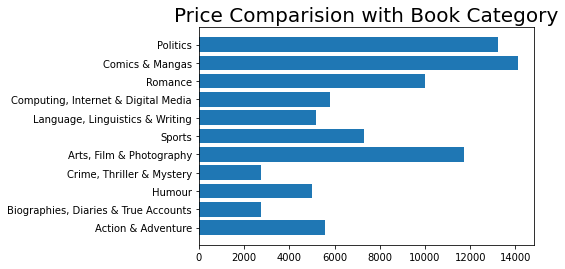

In [ ]:
#Plotting a bar graph for Price v/s Book Category
plt.title('Price Comparision with Book Category',size=20)
plt.barh(train.BookCategory,train.Price)

# ***ALGORITHM MODELLING***

In [ ]:
#importing all the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from sklearn.metrics import mean_squared_log_error

In [ ]:
import pandas as pd

#Claeaning the data - removing the null values
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
dataset = clean_dataset(dataset)

In [ ]:
X = dataset.drop('Price',axis=1) #Making the feature matrix
y = dataset[['Price']]#making the target variable

In [ ]:
#Dividing the dataset into training dataset and testing dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
#Creating the model for random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 101,n_estimators = 50)

In [ ]:
rf.fit(X_train,Y_train)#Fitting the data into the model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=101, verbose=0, warm_start=False)

In [ ]:
y_pred_rf = rf.predict(X_test)#Predicting the values using the random forest model.

In [ ]:
print('RMSLE for random forest regressor:',(np.sqrt(mean_squared_log_error( abs(Y_test),abs(y_pred_rf)))))#Calculating the RMSLE value for the model

RMSLE for random forest regressor: 0.6811229532815147


In [ ]:
#importing the linear regression model from sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
#creating the Linear regression model
linear_reg_model = LinearRegression()

In [ ]:
#fit the model with the given training dataset
linear_reg_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_lr = linear_reg_model.predict(X_test)#Predicting the values using the linear regression model.

In [ ]:
print('RMSLE for linear regression model:',(np.sqrt(mean_squared_log_error( abs(Y_test),abs(y_pred_lr)))))#Calculating the RMSLE value for the model

RMSLE for linear regression model: 0.7912351504412807


As we can see that the value of RSMLE is better for linear regression as compared to Random forest. SO we can say that Linear regression model works better.